# WSI
## Raport z ćwiczenia laboratoryjnego nr 5
### Kacper Bugała, 303739 i Jan Kuc, 303753

### 1. Cel eksperymentów

Zadanie polega na implementacji perceptronu wielowarstwowego oraz wybrangeo algorytmu optymalizacji gradientowej z algorytem propagacji wstecznej. Następnie nalezy wytrenować stworzoną sieć do klasyfikacji odręcznie pisanych cyfr ze zbioru MNIST oraz sprawdzić efekty działania.

### 2. Opis eksperymentów i decyzje projektowe

Do implementacji perceptronu wielowarstwowego stworzono uniwersalną klasę **Network**, która korzysta z pomocniczej klasy **Layer**, dzięki czemu mozna zdefiniować dowolną liczbę warstw ukrytych sieci, podając równiez funkcję aktywacji oraz liczbę neuronów w warstwach ukrytych.

Ostatecznie zdecydowano się na trening oraz testowanie sieci składającej się z 2 warstw ukrytych aktywowanych funkcją *ReLu*. Funkcją aktywacji warstwy wyjściowej jest *softmax*. Funkcja ta, doskonale nadaje się do zadań klasyfikacji wieloklasowej i jest potrzebna do normalizacji wyników na końcu sieci. Dzięki niej na wyjściu otrzymujemy tak naprawdę głosowanie modelu na kazdą z mozliwych klas, a więc ocenione przez model prawdopodobieństwo przynalezności podanego przykładu wejściowego do danej klasy.

Jako algorytm opytmalizacji gradientowej wybrano **Mini-batch SGD** (SGD - Stochastic Gradient Descent). Trening modelu podzielony jest na określoną w parametrach wejśiowych liczbę **epok**, a w skład kazdej epoki wchodzą iteracje, których liczba jest zalezna od podanego w parametrach rozmiaru paczki, tzw. **batch size**.
Metoda podziału danych na losowe paczki w trakcie uczenia ma na celu przyspieszenie uczenia, poniewaz w takim przypadku w kazdej iteracji przez siec "przechodzi" tylko mały fragment danych wejściowych. Im większy rozmiar paczki, tym obliczenia są dluzsze, bo wykonywane na większych rozmiarach macierzy i więcej parametrów do aktualizowania w kazdej iteracji.

Ostatecznie wybrano następujące parametry sieci:
- batch_size = 64
- learning rate = 0.2
- liczba epok = 200
- liczba warstw = 2
- liczba neuronów w warstwach ukrytych = 20

### 3. Oczekiwane rezultaty

### 4. Eksperymenty

In [1]:
import sys
sys.path.append('../src/')
from network import Network
from data_reader import DataReader
from supporting_methods import ReLu, softmax, sigmoid
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = load_digits()

digits_data = dataset["data"]

digits_labels = dataset["target"]

In [3]:
data_reader = DataReader(data=digits_data, labels=digits_labels)

train_data, train_labels, test_data, test_labels, valid_data, valid_labels = data_reader.split_data()

In [4]:
input_size = train_data.shape[1]
input_size

64

In [5]:
output_size = train_labels.shape[1]
output_size

10

In [6]:
net = Network(hidden_count=2,
              hidden_size=20,
              input_size=input_size,
              output_size=output_size,
              hidden_act_fun=ReLu,
              output_act_fun=softmax,
              learning_rate=0.2)

In [7]:
train_accs, train_losses, valid_accs, valid_losses = net.fit(
        epochs=200,
        batch_size=64,
        train_data=train_data,
        train_labels=train_labels,
        valid_data=valid_data,
        valid_labels=valid_labels)

Epoch 1/200
Train data accuracy: 24.58%
train loss: 0.8592
Valid data accuracy: 22.22%
valid loss: 0.8639
---------------------------------------------------------
Epoch 2/200
Train data accuracy: 28.01%
train loss: 0.8021
Valid data accuracy: 26.39%
valid loss: 0.8084
---------------------------------------------------------
Epoch 3/200
Train data accuracy: 41.84%
train loss: 0.7220
Valid data accuracy: 40.56%
valid loss: 0.7258
---------------------------------------------------------
Epoch 4/200
Train data accuracy: 58.53%
train loss: 0.6211
Valid data accuracy: 60.28%
valid loss: 0.6217
---------------------------------------------------------
Epoch 5/200
Train data accuracy: 69.85%
train loss: 0.5199
Valid data accuracy: 69.72%
valid loss: 0.5220
---------------------------------------------------------
Epoch 6/200
Train data accuracy: 75.70%
train loss: 0.4328
Valid data accuracy: 72.78%
valid loss: 0.4433
---------------------------------------------------------
Epoch 7/200
Trai

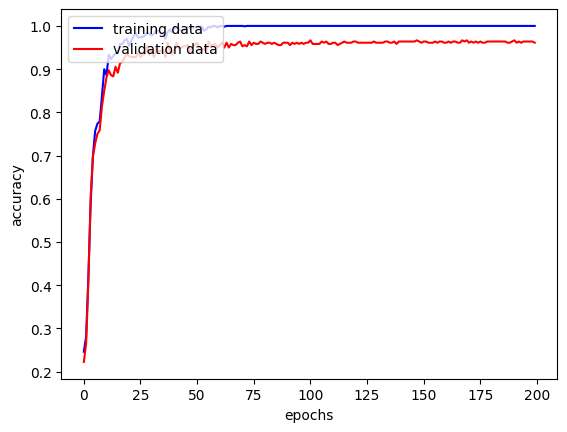

In [8]:
plt.figure()
plt.plot(range(len(train_accs)), train_accs, 'b', label='training data')
plt.plot(range(len(valid_accs)), valid_accs, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

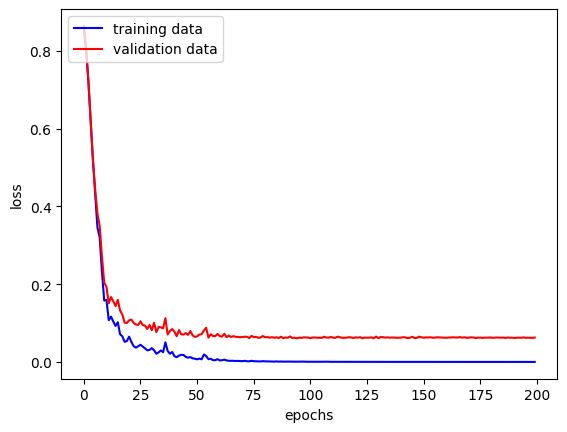

In [9]:
plt.figure()
plt.plot(range(len(train_losses)), train_losses, 'b', label='training data')
plt.plot(range(len(valid_losses)), valid_losses, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Ocena modelu na zbiorze testowym

In [10]:
net.evaluate(test_data, test_labels, "test")

Test data accuracy: 96.66%
test loss: 0.0526


(0.9665738161559888, 0.05264478797833135)

### Metoda do sprawdzania pojedynczych przykładów ze zbioru

Prediction:  [9]
[0 0 0 0 0 0 0 0 0 1]
Label:  9


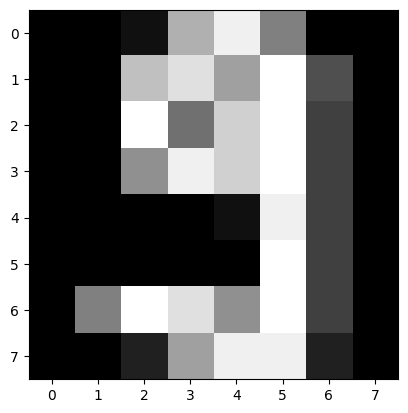

In [18]:
net.test_prediction(test_data, test_labels, 102)

### 5. Wnioski